In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from constant_utils import *

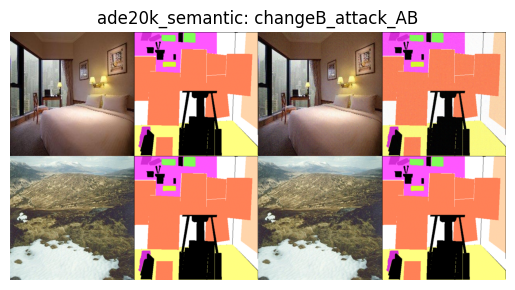

In [37]:

# task = 'nyu_depth'
task = 'ade20k_semantic'
# task = 'lol_enhance'

# attack_id = 'none'
# attack_id = 'attack_A'
# attack_id = 'attack_B'
# attack_id = 'attack_C'
attack_id = 'attack_AB'
# attack_id = 'attack_AC'

epsilon = 8
i = 67

# change_id = 'changeA'
change_id = 'changeB'
# change_id = 'changeB_2'

if task == 'nyu_depth':
    img_2 = np.load(f'/hhd3/ld/data/Painter_root/{task}/reimp_PGD10_8/{change_id}/{attack_id}/img2_prompt_{i}.npy')
    img_2_adv = np.load(f'/hhd3/ld/data/Painter_root/{task}/reimp_PGD10_8/{change_id}/{attack_id}/img2_prompt_{i}_adv.npy') 
    tgt_2 = np.load(f'/hhd3/ld/data/Painter_root/{task}/reimp_PGD10_8/{change_id}/{attack_id}/tgt2_prompt_{i}.npy') 
    tgt_2_adv = np.load(f'/hhd3/ld/data/Painter_root/{task}/reimp_PGD10_8/{change_id}/{attack_id}/tgt2_prompt_{i}_adv.npy') 

else:
    img_2 = np.load(f'/hhd3/ld/data/Painter_root/{task}/reimp_PGD10_8/{change_id}/{attack_id}/img2_prompt.npy')
    img_2_adv = np.load(f'/hhd3/ld/data/Painter_root/{task}/reimp_PGD10_8/{change_id}/{attack_id}/img2_prompt_adv.npy') 
    tgt_2 = np.load(f'/hhd3/ld/data/Painter_root/{task}/reimp_PGD10_8/{change_id}/{attack_id}/tgt2_prompt.npy') 
    tgt_2_adv = np.load(f'/hhd3/ld/data/Painter_root/{task}/reimp_PGD10_8/{change_id}/{attack_id}/tgt2_prompt_adv.npy') 


test_img = np.concatenate((img_2, tgt_2, img_2_adv, tgt_2_adv), axis=1)
plt.axis('off')
plt.title(f'{task}: {change_id}_{attack_id}')
plt.imshow(test_img)

# plt.savefig()

In [34]:
print('%%DATA range, check whether in [0,1]:')
print(img_2.min(), img_2.max(), img_2_adv.min(), img_2_adv.max())
print(tgt_2.min(), tgt_2.max(), tgt_2_adv.min(), tgt_2_adv.max())
print('%%ADV range, check whether in [-epsilon, epsilon]:')
print((img_2_adv - img_2).min(), (img_2_adv - img_2).max(),(img_2_adv - img_2).min() >= -epsilon/255, (img_2_adv - img_2).max() <= epsilon/255)
print((tgt_2_adv - tgt_2).min(), (tgt_2_adv - tgt_2).max(),(tgt_2_adv - tgt_2).min() >= -epsilon/255, (tgt_2_adv - tgt_2).max() <= epsilon/255)

%%DATA range, check whether in [0,1]:
0.0 1.0 0.0 1.0
0.0 1.0 0.0 1.0
%%ADV range, check whether in [-epsilon, epsilon]:
-0.03137254901960784 0.03137254901960787 True False
-0.03137254901960784 0.03137254901960787 True False


In [35]:
img_2_adv - img_2

array([[[ 0.02352941,  0.03137255, -0.02352941],
        [-0.01771497, -0.03137255, -0.03137255],
        [-0.01720386, -0.03137255, -0.03137255],
        ...,
        [ 0.00798811, -0.01261014,  0.02253685],
        [-0.00544899,  0.0044692 , -0.00951678],
        [ 0.00215733,  0.01060564, -0.01416439]],

       [[-0.01411535,  0.01962089, -0.0094028 ],
        [-0.01166778, -0.00784314,  0.03137255],
        [ 0.03090288,  0.03137255,  0.03137255],
        ...,
        [ 0.02165293, -0.00396123,  0.02038545],
        [ 0.02352941,  0.00233319,  0.01568627],
        [ 0.00666032, -0.01568627, -0.00238875]],

       [[-0.03137255,  0.02352941,  0.00387749],
        [-0.01568627, -0.03137255,  0.01568627],
        [-0.01971617, -0.01955176,  0.0081555 ],
        ...,
        [ 0.00962805,  0.02352941,  0.01934536],
        [ 0.01293679, -0.00277106, -0.01110309],
        [ 0.00267629, -0.02352941, -0.03137255]],

       ...,

       [[ 0.        ,  0.        ,  0.        ],
        [ 0

In [36]:
tgt_2_adv - tgt_2

array([[[-0.00784314,  0.        , -0.02352941],
        [ 0.        ,  0.        , -0.03137255],
        [ 0.        , -0.02352941, -0.03137255],
        ...,
        [-0.01592437, -0.02243659, -0.00784314],
        [-0.01568627,  0.        , -0.01568627],
        [-0.01568627, -0.02352941, -0.00784314]],

       [[-0.01568627, -0.02352941, -0.00784314],
        [-0.02352941, -0.01568627, -0.00784314],
        [-0.02352941, -0.00784314,  0.        ],
        ...,
        [ 0.        , -0.00784314, -0.02352941],
        [ 0.        , -0.00784314, -0.03137255],
        [-0.00784314, -0.01568627, -0.03137255]],

       [[-0.00784314, -0.00784314, -0.01005993],
        [-0.02352941, -0.01568627, -0.00784314],
        [-0.02352941, -0.03137255, -0.00784314],
        ...,
        [-0.01568627, -0.01568627, -0.02352941],
        [-0.01568627, -0.01568627, -0.0278221 ],
        [-0.00784314, -0.02352941, -0.01568627]],

       ...,

       [[ 0.        ,  0.        ,  0.        ],
        [ 0